In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import os
from tqdm import tqdm
from mappings import get_element_mapping, get_item_mapping, get_area_mapping
from utils import load_dataframe, get_element_from_mapping, reshape_dataframe, percentage_of_total

# Exploring data for 1 csv

In [4]:
dirname = os.getcwd() + '\data\production'
filename = dirname + '\Production_CropsProcessed_E_All_Data_(Normalized).csv'
production = load_dataframe(filename)

In [6]:
elt_map = get_element_mapping(production)
item_map = get_item_mapping(production)
area_map = get_area_mapping(production)
print(' number of elements: {}\n number of items: {} \n number of areas: {}'\
      .format(len(elt_map), len(item_map), len(area_map)))

 number of elements: 1
 number of items: 21 
 number of areas: 242


In [7]:
production.columns

Index(['areacode', 'area', 'itemcode', 'item', 'elementcode', 'element',
       'yearcode', 'year', 'unit', 'value', 'flag'],
      dtype='object')

In [8]:
production.dtypes
# check that this is consistent throughout csv? anyways all the codes seem right.

areacode         int64
area            object
itemcode         int64
item            object
elementcode      int64
element         object
yearcode         int64
year             int64
unit            object
value          float64
flag            object
dtype: object

# Now take a closer look at the data

In [9]:
os.listdir(os.getcwd()+'\data')

['.ipynb_checkpoints',
 'Areas.csv',
 'country_groups.csv',
 'emissions_agriculture',
 'emissions_land',
 'environment',
 'Flags.csv',
 'Forestry_E_All_Data_(Normalized).csv',
 'inputs',
 'Population_E_All_Data_(Normalized).csv',
 'production']

In [10]:
regions = load_dataframe(os.getcwd()+'\data\country_groups.csv')

In [2]:
regions.countrygroup.unique()

NameError: name 'regions' is not defined

# Grouping data by area

### World

(1961, 2014)

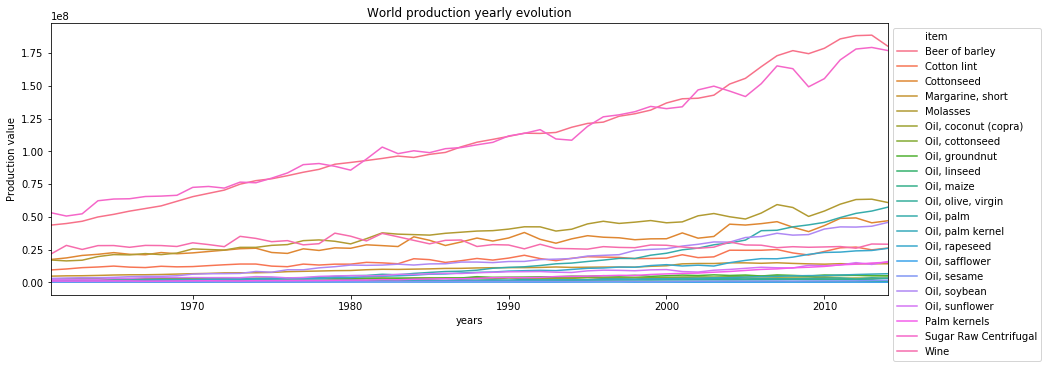

In [12]:
world  = production[production.area == 'World']

fig, ax = plt.subplots(figsize=(15,5))

sns.lineplot(x= 'year', y = 'value' ,hue = 'item', data = world)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1);
ax.set_title("World production yearly evolution")
ax.set_ylabel("Production value")
ax.set_xlabel('years')
ax.set_xlim(left = 1961, right = 2014)

### Continents

(1961, 2014)

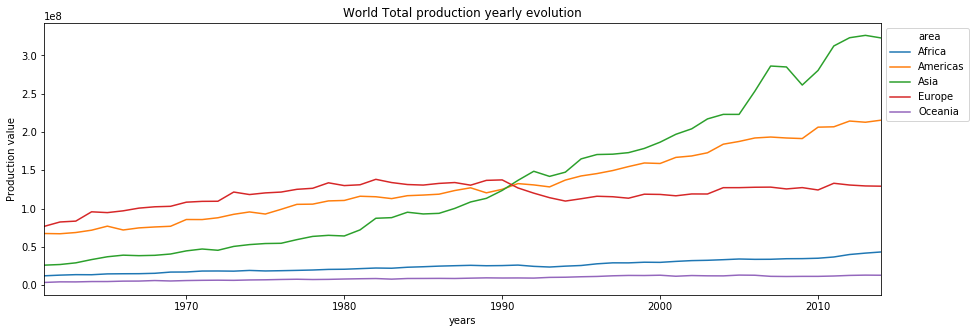

In [13]:
continents_list = ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']
continents  = production[production.area.isin(continents_list)]

fig, ax = plt.subplots(figsize=(15,5), nrows = 1)

sns.lineplot(x= 'year', y = 'value' ,hue = 'area', data = continents.groupby(['area', 'year']).agg({'value':'sum'}).reset_index(), ax = ax)
ax.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1);
ax.set_title("World Total production yearly evolution")
ax.set_ylabel("Production value")
ax.set_yscale('linear')
ax.set_xlabel('years')
ax.set_xlim(left = 1961, right = 2014)

## Now look at each continent separately

#### Both log and linear scales but can't see clearly

5it [00:15,  3.02s/it]


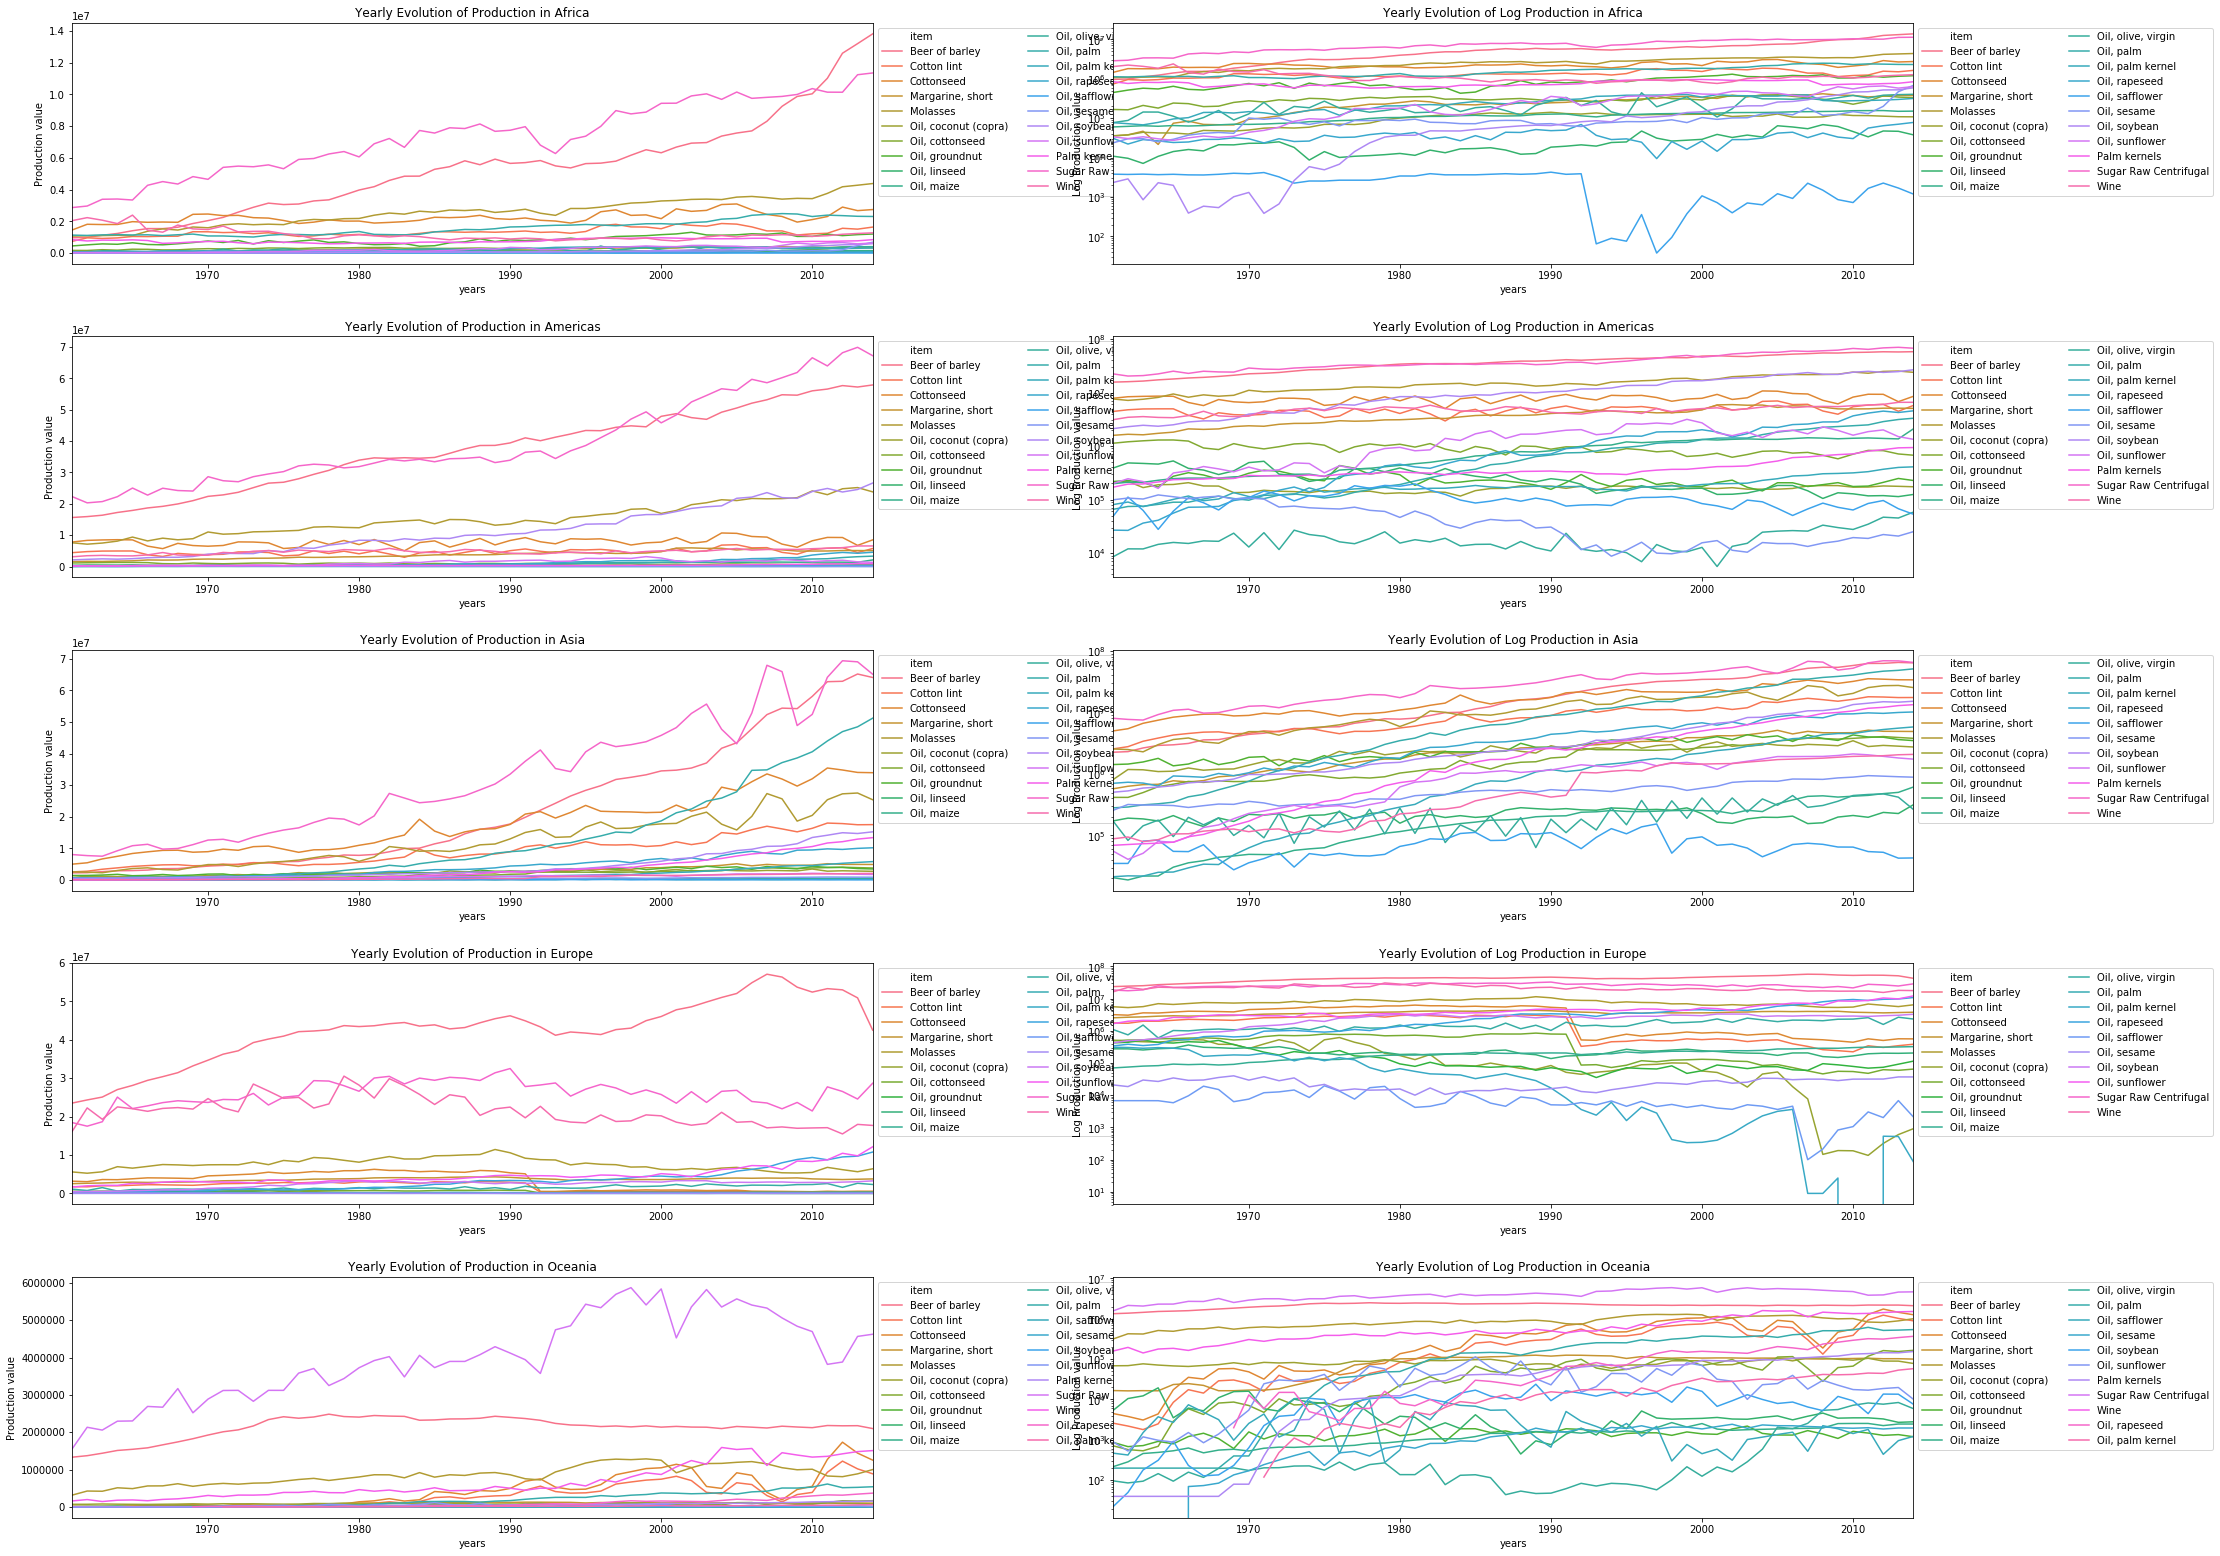

In [14]:
# should use widgets

fig, ax = plt.subplots( figsize = (15 * 2 * 1.1, 5 * len(continents_list) * 1.1), nrows = len(continents_list), ncols = 2)
plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.3)

for idx, val in tqdm(enumerate(continents_list)):
    sns.lineplot(x = 'year', y = 'value', hue = 'item', \
                 data = continents[continents.area == val].groupby(['year', 'item']).agg({'value':'sum'}, axis = 1).reset_index(), \
                 ax = ax[idx][0])
    ax[idx][0].legend(bbox_to_anchor = (1, 1), loc = 'upper left', ncol = 2)
    ax[idx][0].set_title('Yearly Evolution of Production in '+ val)
    ax[idx][0].set_ylabel("Production value")
    ax[idx][0].set_yscale('linear')
    ax[idx][0].set_xlabel('years')
    ax[idx][0].set_xlim(left = 1961, right = 2014)

    sns.lineplot(x = 'year', y = 'value', hue = 'item', \
                 data = continents[continents.area == val].groupby(['year', 'item']).agg({'value':'sum'}, axis = 1).reset_index(), \
                 ax = ax[idx][1])
    ax[idx][1].legend(bbox_to_anchor = (1, 1), loc = 'upper left', ncol = 2)
    ax[idx][1].set_title('Yearly Evolution of Log Production in '+ val)
    ax[idx][1].set_ylabel("Log Production value")
    ax[idx][1].set_yscale('log')
    ax[idx][1].set_xlabel('years')
    ax[idx][1].set_xlim(left = 1961, right = 2014)
    
    
    

## Grouping income areas together

In [15]:
mask = ['income' in regions.countrygroup[idx] for idx, val in enumerate(regions.countrygroup)]
income_list = regions[mask].rename(columns = {'country':'area'})
income_list.countrygroup.unique()
incomes = production.merge(income_list, how = 'left', on = 'area')

21it [00:15,  1.43it/s]


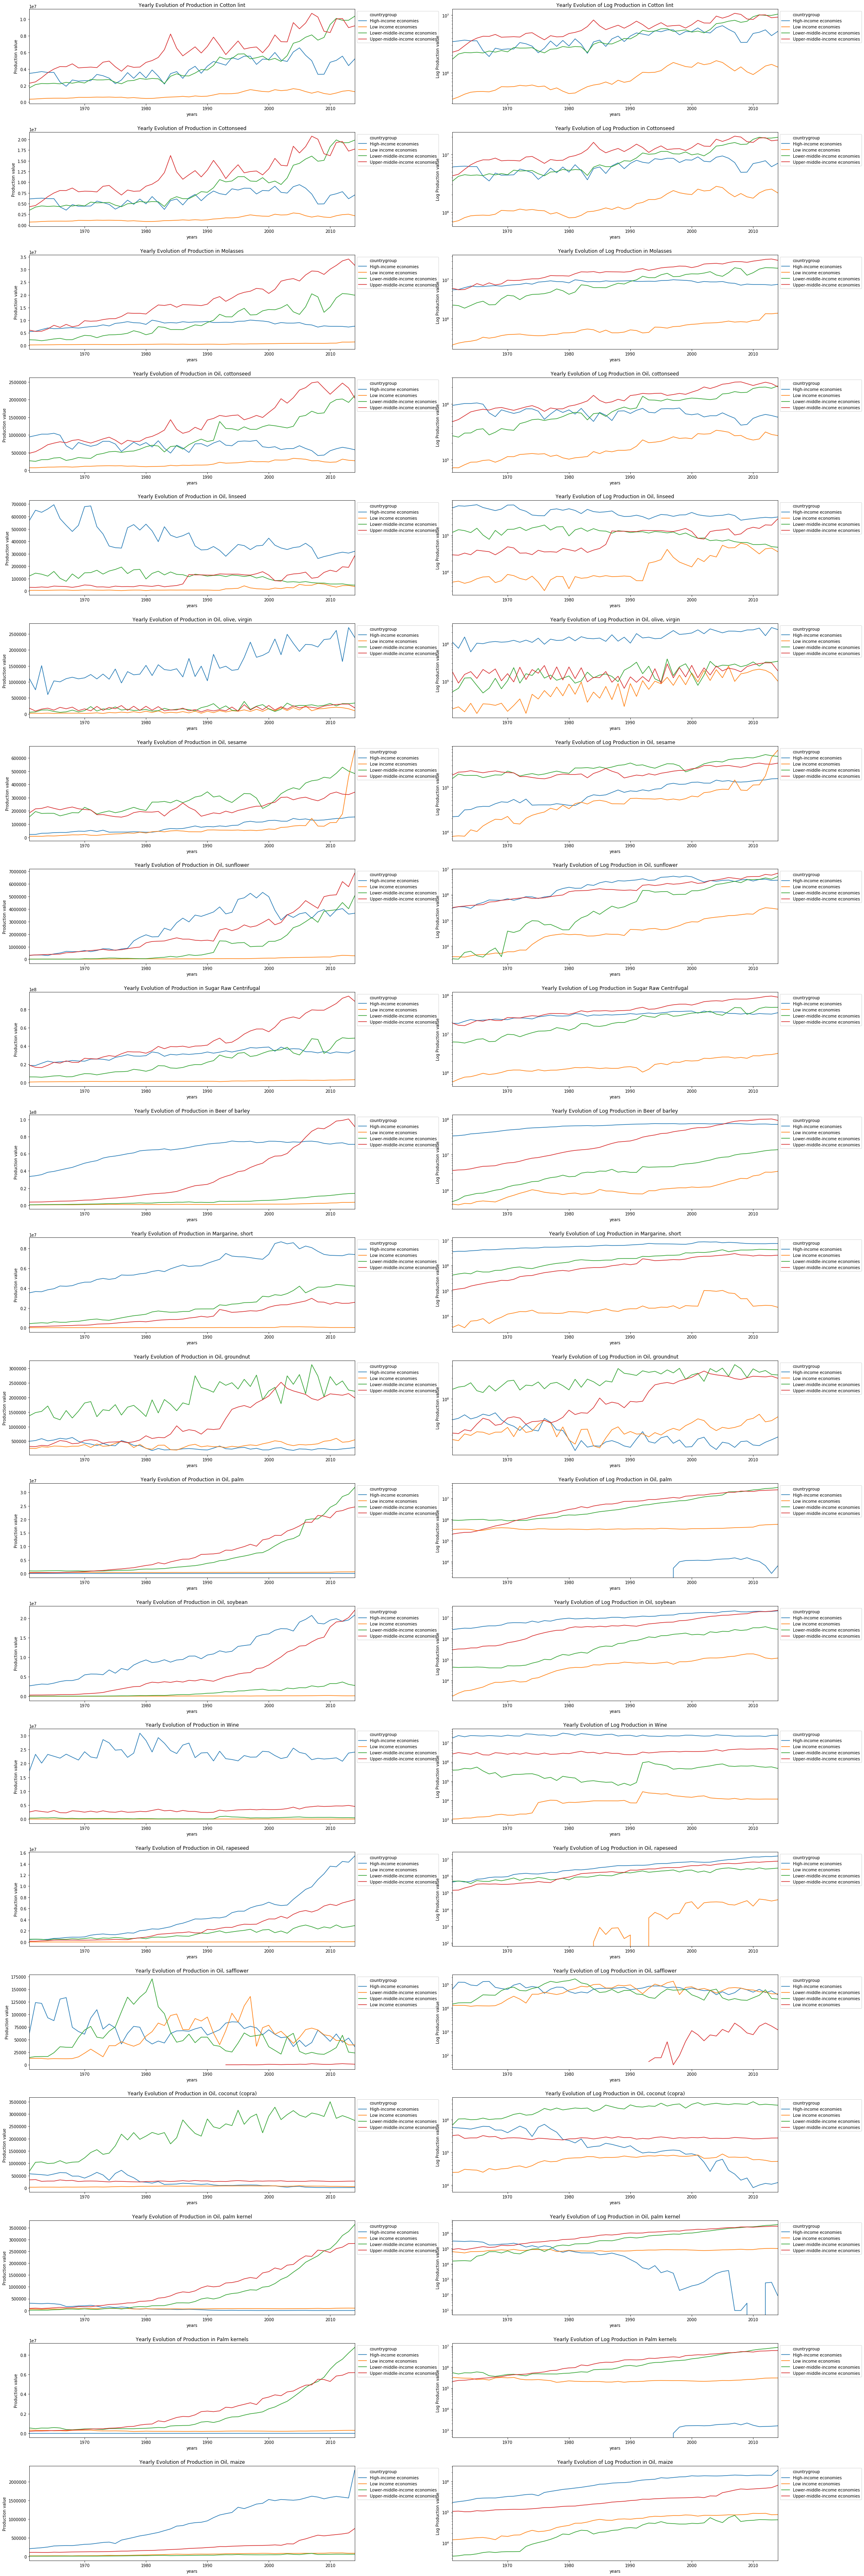

In [16]:
# should use widgets
item_list = production.item.unique()

fig, ax = plt.subplots( figsize = (15 * 2 * 1.1, 5 * len(item_list) * 1.1), nrows = len(item_list), ncols = 2)
plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.3)

for idx, val in tqdm(enumerate(item_list)):
    sns.lineplot(x = 'year', y = 'value', hue = 'countrygroup', \
                 data = incomes[incomes.item == val].groupby(['year', 'countrygroup']).agg({'value':'sum'}, axis = 1).reset_index(), \
                 ax = ax[idx][0])
    ax[idx][0].legend(bbox_to_anchor = (1, 1), loc = 'upper left', ncol = 1)
    ax[idx][0].set_title('Yearly Evolution of Production in '+ val)
    ax[idx][0].set_ylabel("Production value")
    ax[idx][0].set_yscale('linear')
    ax[idx][0].set_xlabel('years')
    ax[idx][0].set_xlim(left = 1961, right = 2014)

    sns.lineplot(x = 'year', y = 'value', hue = 'countrygroup', \
                 data = incomes[incomes.item == val].groupby(['year', 'countrygroup']).agg({'value':'sum'}, axis = 1).reset_index(), \
                 ax = ax[idx][1])
    ax[idx][1].legend(bbox_to_anchor = (1, 1), loc = 'upper left', ncol = 1)
    ax[idx][1].set_title('Yearly Evolution of Log Production in '+ val)
    ax[idx][1].set_ylabel("Log Production value")
    ax[idx][1].set_yscale('log')
    ax[idx][1].set_xlabel('years')
    ax[idx][1].set_xlim(left = 1961, right = 2014)   

# Grouping items together

## Look at each item separately

#### Both log and linear items together but can't see as clearly

21it [00:16,  1.31it/s]


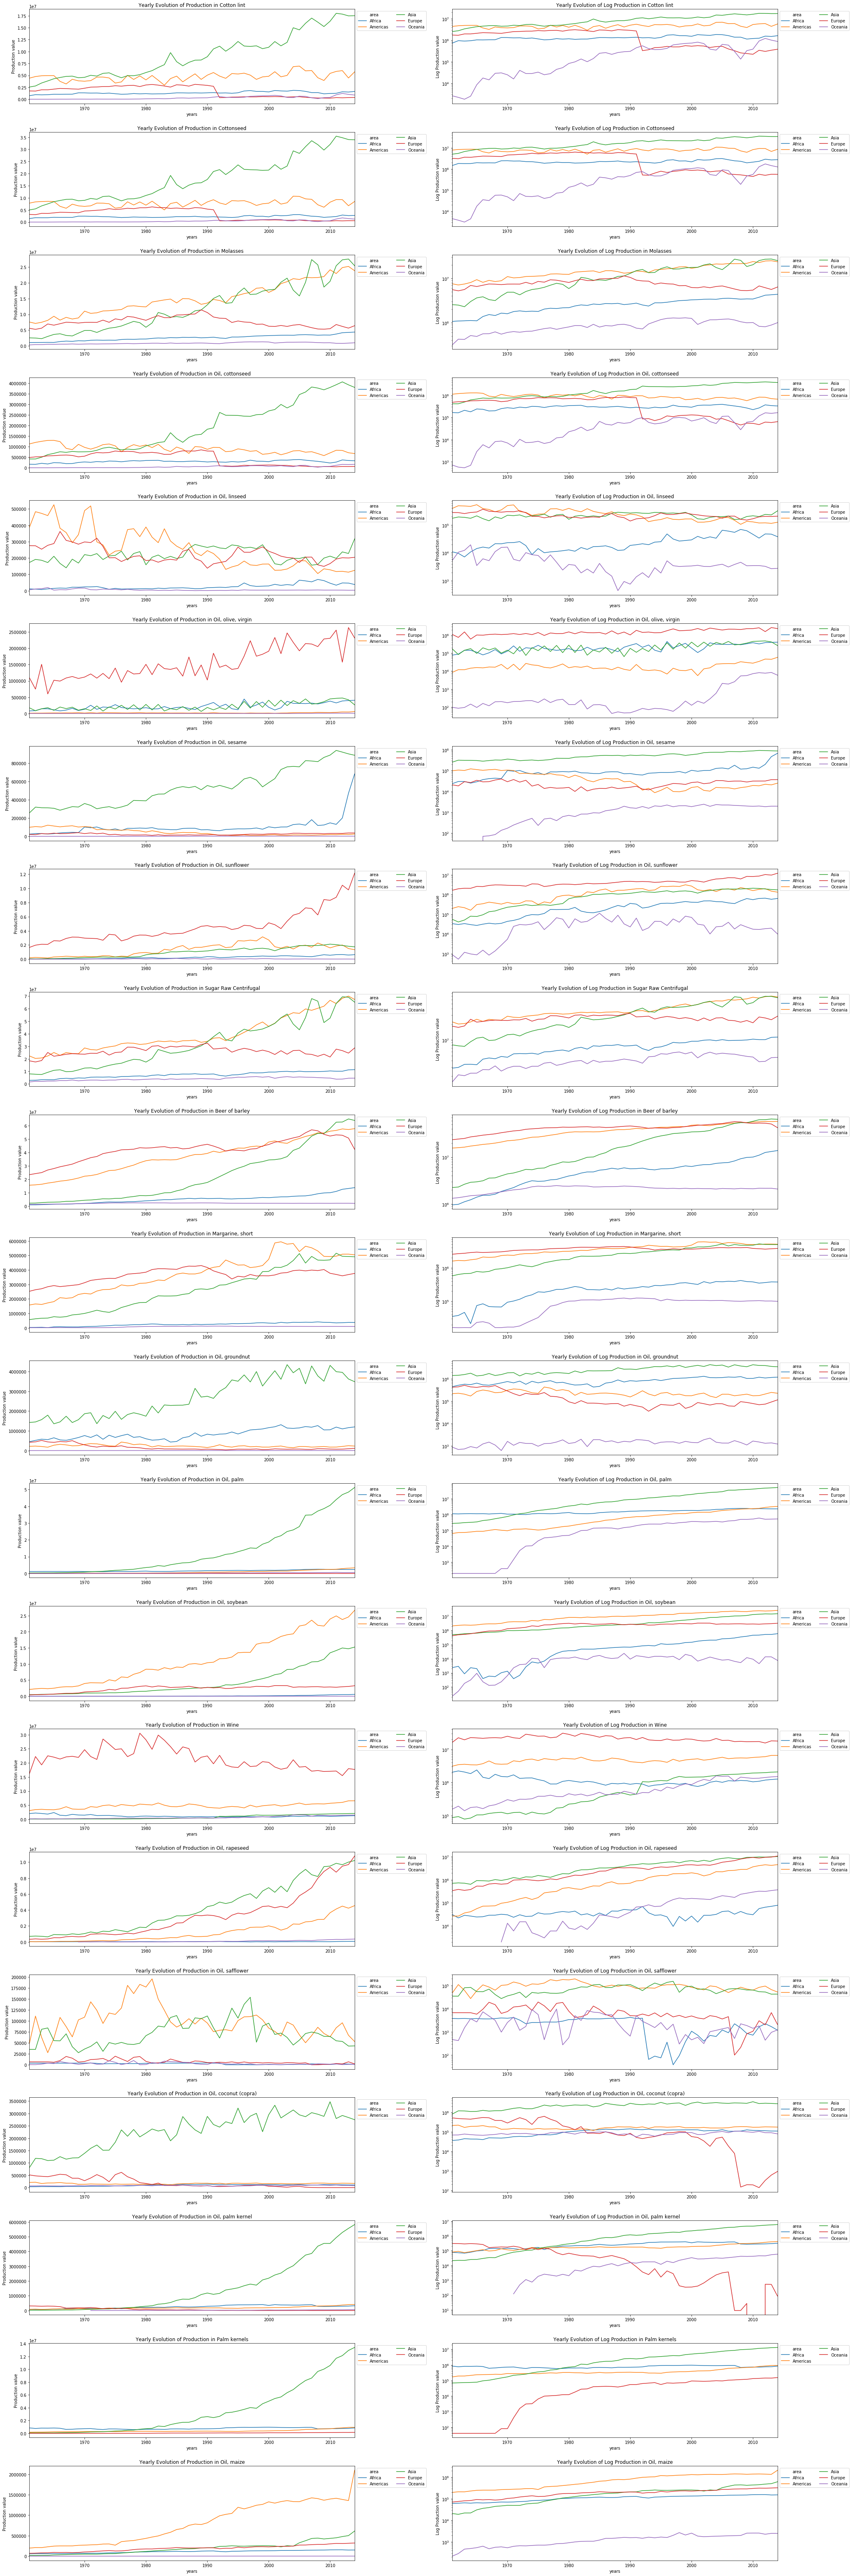

In [17]:
# should use widgets
item_list = production.item.unique()

fig, ax = plt.subplots( figsize = (15 * 2 * 1.1, 5 * len(item_list) * 1.1), nrows = len(item_list), ncols = 2)
plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.3)

for idx, val in tqdm(enumerate(item_list)):
    sns.lineplot(x = 'year', y = 'value', hue = 'area', \
                 data = continents[continents.item == val].groupby(['year', 'area']).agg({'value':'sum'}, axis = 1).reset_index(), \
                 ax = ax[idx][0])
    ax[idx][0].legend(bbox_to_anchor = (1, 1), loc = 'upper left', ncol = 2)
    ax[idx][0].set_title('Yearly Evolution of Production in '+ val)
    ax[idx][0].set_ylabel("Production value")
    ax[idx][0].set_yscale('linear')
    ax[idx][0].set_xlabel('years')
    ax[idx][0].set_xlim(left = 1961, right = 2014)

    sns.lineplot(x = 'year', y = 'value', hue = 'area', \
                 data = continents[continents.item == val].groupby(['year', 'area']).agg({'value':'sum'}, axis = 1).reset_index(), \
                 ax = ax[idx][1])
    ax[idx][1].legend(bbox_to_anchor = (1, 1), loc = 'upper left', ncol = 2)
    ax[idx][1].set_title('Yearly Evolution of Log Production in '+ val)
    ax[idx][1].set_ylabel("Log Production value")
    ax[idx][1].set_yscale('log')
    ax[idx][1].set_xlabel('years')
    ax[idx][1].set_xlim(left = 1961, right = 2014)
    
    
    

In [18]:
production.item.unique()

array(['Cotton lint', 'Cottonseed', 'Molasses', 'Oil, cottonseed',
       'Oil, linseed', 'Oil, olive, virgin', 'Oil, sesame',
       'Oil, sunflower', 'Sugar Raw Centrifugal', 'Beer of barley',
       'Margarine, short', 'Oil, groundnut', 'Oil, palm', 'Oil, soybean',
       'Wine', 'Oil, rapeseed', 'Oil, safflower', 'Oil, coconut (copra)',
       'Oil, palm kernel', 'Palm kernels', 'Oil, maize'], dtype=object)

It doesnt really seem to make sense to bundle some items together... 
Also the unit used is always the same but obviously some of these are harder to extract than others... 
so Analysis should maybe be done item-wise 

# Looking at flags

In [19]:
flags = load_dataframe(os.getcwd() + '\data\Flags.csv')
prod_flags = production.flag.unique()
# not picking up NaN which means both official data and Non Applicable

mask = [flags.flag[idx] in prod_flags for idx, val in enumerate(flags.flag)]
flags[mask]

flag                                              flags
1     *                                  Unofficial figure
2     A  Aggregate, may include official, semi-official...
10    F                                       FAO estimate
13   Fc                                    Calculated data
18   Im           FAO data based on imputation methodology
19    M                                 Data not available

In [41]:
print(len(production) - production.count(),' \n \n total', len(production))
# nan dont show up as count so thats why flags is = showing up as many
# investigate value thing further, missing 5k ish

areacode           0
area               0
itemcode           0
item               0
elementcode        0
element            0
yearcode           0
year               0
unit               0
value           5199
flag           25757
dtype: int64  
 
 total 116502


In [49]:
print('production nan flags (= real raw data) percentage: {}'\
      .format((len(production.flag) - production.flag.count() )/ len(production.flag) * 100))

production nan flags (= real raw data) percentage: 22.10863332818321


In [21]:
production.groupby('flag').agg({'flag':'count'}).rename({'flag':'count'}, axis = 1).reset_index()

flag  count
0    *  14018
1    A  30983
2    F  10219
3   Fc  14402
4   Im  16127
5    M   4996

In [22]:
production.groupby(['flag','area']).agg({'flag':'count'}).rename({'flag':'count'}, axis = 1)\
        .reset_index().sort_values(['flag','count'], ascending = False).head()
# should look into whether some countries have too much weird data.

flag                  area  count
831    M                Norway    190
825    M                 Nepal    173
848    M          Saudi Arabia    152
824    M               Namibia    130
868    M  United Arab Emirates    126

# Reshaping data

In [71]:
cont_pivot = continents.drop(['areacode', 'itemcode','elementcode', 'yearcode', 'flag','unit'], axis = 1)
cont_pivot = cont_pivot.pivot(columns = 'element', values = ['year', 'area', 'item', 'value'])
cont_pivot.head()

year       area            item        value
element Production Production      Production   Production
87662         1961     Africa  Beer of barley       963413
87663         1962     Africa  Beer of barley       990101
87664         1963     Africa  Beer of barley  1.12115e+06
87665         1964     Africa  Beer of barley  1.23558e+06
87666         1965     Africa  Beer of barley  1.40654e+06

In [79]:
# what about if we pivot items?
cont_pivot = continents.drop(['areacode', 'itemcode','elementcode', 'yearcode', 'flag','unit'], axis = 1)
cont_pivot = cont_pivot.pivot(columns = 'item', values = ['year', 'area', 'element', 'value'])
cont_pivot.head()

year                                                   \
item  Beer of barley Cotton lint Cottonseed Margarine, short Molasses   
87662           1961         NaN        NaN              NaN      NaN   
87663           1962         NaN        NaN              NaN      NaN   
87664           1963         NaN        NaN              NaN      NaN   
87665           1964         NaN        NaN              NaN      NaN   
87666           1965         NaN        NaN              NaN      NaN   

                                                                        \
item  Oil, coconut (copra) Oil, cottonseed Oil, groundnut Oil, linseed   
87662                  NaN             NaN            NaN          NaN   
87663                  NaN             NaN            NaN          NaN   
87664                  NaN             NaN            NaN          NaN   
87665                  NaN             NaN            NaN          NaN   
87666                  NaN             NaN            NaN          NaN   

                  ...     value                                                \
item  Oil, maize  ... Oil, palm Oil, palm kernel Oil, rapeseed Oil, safflower   
87662        NaN  ...       NaN              NaN           NaN            NaN   
87663        NaN  ...       NaN              NaN           NaN            NaN   
87664        NaN  ...       NaN              NaN           NaN            NaN   
87665        NaN  ...       NaN              NaN           NaN            NaN   
87666        NaN  ...       NaN              NaN           NaN            NaN   

                                                            \
item  Oil, sesame Oil, soybean Oil, sunflower Palm kernels   
87662         NaN          NaN            NaN          NaN   
87663         NaN          NaN            NaN          NaN   
87664         NaN          NaN            NaN          NaN   
87665         NaN          NaN            NaN          NaN   
87666         NaN          NaN            NaN          NaN   

                                  
item  Sugar Raw Centrifugal Wine  
87662                   NaN  NaN  
87663                   NaN  NaN  
87664                   NaN  NaN  
87665                   NaN  NaN  
87666                   NaN  NaN  

[5 rows x 84 columns]

In [98]:
(len(cont_pivot) - cont_pivot.count())

       item                 
year   Beer of barley           5328
       Cotton lint              5328
       Cottonseed               5328
       Margarine, short         5328
       Molasses                 5328
                                ... 
value  Oil, soybean             5328
       Oil, sunflower           5328
       Palm kernels             5382
       Sugar Raw Centrifugal    5328
       Wine                     5328
Length: 84, dtype: int64

# Which data is important to our research

overall production quantities and production normalized over population per year should be looked into
different production crops / commodities require different amounts of fertilizer / water / resources and have different impacts on the environment, so separating items is a good idea until a further in-depth analysis of which item causes how much damage to the environment is done. 
Should not look at countries individually just for this unless we spot something weird.

# Data visualization

In [326]:
import geopandas as gpd
import geoplot
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

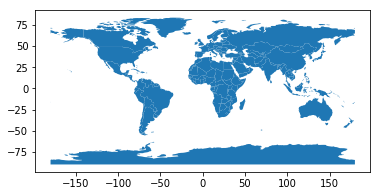

In [335]:
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).rename({'name':'area'},axis = 1)
world_map.plot()

## LIVESTOCK: Head counts

In [443]:
# world_map.columns
# world_map.iso_a3.unique()
livestock.area.nunique() == regions.country.nunique()
livestock.unit.unique()
livestock.columns

Index(['areacode', 'area', 'itemcode', 'item', 'elementcode', 'element',
       'yearcode', 'year', 'unit', 'value', 'flag'],
      dtype='object')

In [489]:
livestock[livestock.unit == 'No'].item.unique()
# for now lets not worry about this... 

array(['Beehives'], dtype=object)

In [565]:
# YEAR 2000 only, use widgets for interactivty for different years
livestock_plot = livestock[(livestock.year == 2002)&(livestock.unit != 'No')]
livestock_plot[livestock_plot.unit == '1000 Head']['value'] = livestock_plot[livestock_plot.unit == '1000 Head']['value'].apply(lambda x: 1000*x)
# the line of code above is fugly, should check
livestock_plot = livestock_plot\
    .drop(['areacode', 'itemcode', 'elementcode', 'yearcode', 'year', 'flag'], axis = 1)\
    .merge(regions\
           .rename({'country':'area'}, axis = 1)\
           .drop(['countrygroupcode', 'countrygroup', 'countrycode', 'm49code', 'iso2code'], axis = 1), on = 'area')\
    .drop_duplicates()\
    .rename({'iso3code':'iso_a3'}, axis = 1)\
    .groupby(['iso_a3'])\
    .agg({'value':'sum'})\
    .rename({'value':'head_count'}, axis = 1)\
    .reset_index()

C:\Users\theop\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [566]:
merged = world_map.merge(livestock_plot, on = 'iso_a3')

Text(0.5, 1.0, 'Livestock Head Count per Country in 2002')

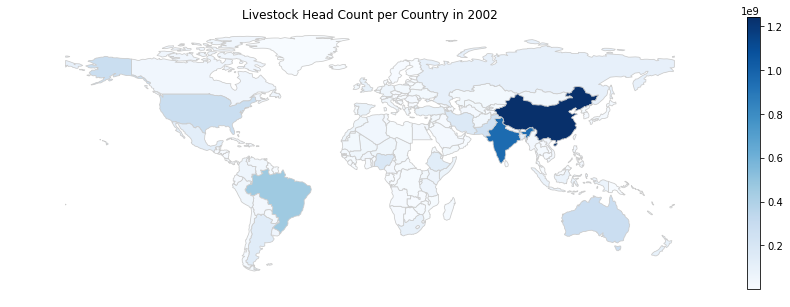

In [567]:
fig, ax = plt.subplots(figsize=(15,5))
merged.plot(column='head_count', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend = True)
ax.axis('off')
ax.set_title('Livestock Head Count per Country in 2002')
# this is not really representative of anything...

### Now repeat the plot but normalize by population!

In [568]:
population = load_dataframe(os.getcwd() + '\data\Population_E_All_Data_(Normalized).csv')

In [569]:
population.unit.unique()

array(['1000 persons'], dtype=object)

In [570]:
pop_tot = population[(population.element == 'Total Population - Both sexes') & (population.year == 2002)]
pop_tot.value = pop_tot.value.apply(lambda x: x* 1000)
pop_tot = pop_tot.merge(regions.rename({'country':'area'}, axis = 1), on = 'area')\
    .drop(['areacode', 'itemcode', 'elementcode', 'yearcode', 'flag', \
           'note','countrygroupcode','countrycode', 'countrygroup', \
           'm49code', 'iso2code', 'item','unit','element', 'year', 'area'], axis = 1)\
    .rename({'value':'population', 'iso3code':'iso_a3'}, axis = 1)\
    .drop_duplicates()

merged = merged.merge(pop_tot, on = 'iso_a3')

merged['head_count_per_pop'] = merged.apply(lambda x: x['head_count']/x['population'], axis = 1)

C:\Users\theop\Anaconda3\lib\site-packages\pandas\core\generic.py:5209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Text(0.5, 1.0, 'Livestock Head Count per Country per population in 2002')

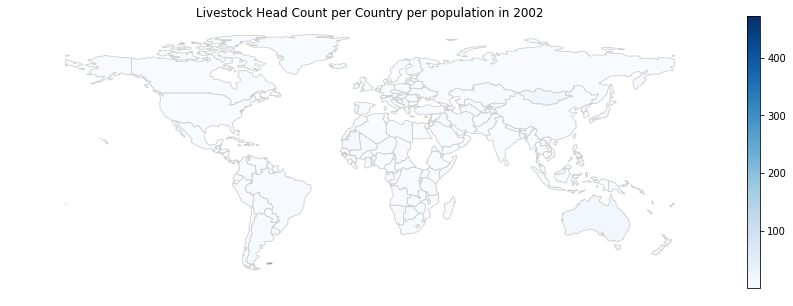

In [571]:
fig, ax = plt.subplots(figsize=(15,5))
merged.plot(column='head_count_per_pop', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend = True)
ax.axis('off')
ax.set_title('Livestock Head Count per Country per population in 2002')
# this is not really representative of anything...

## comparing all production for every csv df

In [120]:
files = os.listdir(dirname)
crops_processed = load_dataframe(dirname + "\\" + files[0])
crops = load_dataframe(dirname + "\\" + files[1])
indices = load_dataframe(dirname + "\\" + files[2])
livestock_primary = load_dataframe(dirname + "\\" + files[3])
livestock_processed = load_dataframe(dirname + "\\" + files[4])
livestock = load_dataframe(dirname + "\\" + files[5])

In [131]:
crops_processed.element.unique()

array(['Production'], dtype=object)

In [132]:
crops.element.unique()
# for now just look at production?

array(['Area harvested', 'Yield', 'Production'], dtype=object)

In [133]:
indices.element.unique()
# will not look at this just now?

array(['Gross Production Index Number (2004-2006 = 100)',
       'Gross per capita Production Index Number (2004-2006 = 100)',
       'Net Production Index Number (2004-2006 = 100)',
       'Net per capita Production Index Number (2004-2006 = 100)'],
      dtype=object)

In [138]:
livestock_primary.element.unique()
# multiple elements for now just look at production?

array(['Laying', 'Yield', 'Production', 'Producing Animals/Slaughtered',
       'Yield/Carcass Weight', 'Milk Animals', 'Prod Popultn'],
      dtype=object)

In [137]:
livestock_processed.element.unique()
# 1 element straight forward

array(['Production'], dtype=object)

In [136]:
livestock.element.unique()
# 1 element straight forward

array(['Stocks'], dtype=object)

In [152]:
np.testing.assert_array_equal(crops_processed.columns, crops.columns)
np.testing.assert_array_equal(crops_processed.columns, indices.columns)
np.testing.assert_array_equal(crops_processed.columns, livestock_primary.columns)
np.testing.assert_array_equal(crops_processed.columns, livestock_processed.columns)
np.testing.assert_array_equal(crops_processed.columns, livestock.columns)

In [246]:
# get df select only production and select only world then value agg count then merge all df
prod1 = crops_processed[(crops_processed.area == 'World')&(crops_processed.element == 'Production')].groupby(['area', 'year', 'flag']).agg({'value':'sum'}).reset_index().rename({'value':'crops_processed'}, axis = 1)
prod2 = crops[(crops.area == 'World')&(crops.element == 'Production')].groupby(['area', 'year', 'flag']).agg({'value':'sum'}).reset_index().rename({'value':'crops'}, axis = 1)
prod3 = livestock_primary[(livestock_primary.area == 'World')&(livestock_primary.element == 'Production')].groupby(['area', 'year', 'flag']).agg({'value':'sum'}).reset_index().rename({'value':'livestock_primary'}, axis = 1)
prod4 = livestock_processed[(livestock_processed.area == 'World')&(livestock_processed.element == 'Production')].groupby(['area', 'year', 'flag']).agg({'value':'sum'}).reset_index().rename({'value':'livestock_processed'}, axis = 1)
prod5 = livestock[(livestock.area == 'World')&(livestock.element == 'Stocks')].groupby(['area', 'year', 'flag']).agg({'value':'sum'}).reset_index().rename({'value':'livestock'}, axis = 1)
prod_tot = prod1.merge(prod2, how = 'outer')\
    .merge(prod3, how = 'outer')\
    .merge(prod4, how = 'outer')\
    .merge(prod5, how = 'outer')\
    .melt(id_vars = ['area', 'year', 'flag'], var_name = 'total_production', value_name = 'value')

In [220]:
print(crops_processed.year.max(),
      crops.year.max(),
      livestock_primary.year.max(),
      livestock_processed.year.max(),
      livestock.year.max())

2014 2017 2017 2014 2017


In [229]:
print(crops_processed.year.min(),
      crops.year.min(),
      livestock_primary.year.min(),
      livestock_processed.year.min(),
      livestock.year.min())

1961 1961 1961 1961 1961


(1961, 2017)

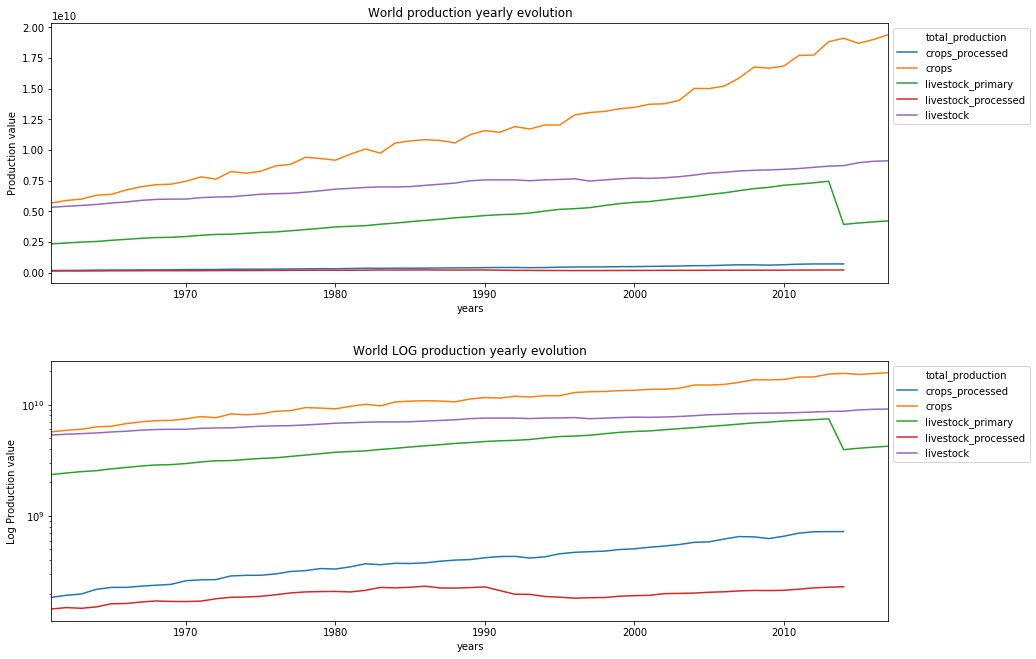

In [311]:
fig, ax = plt.subplots(figsize=(15,5 * 2 * 1.1), nrows = 2)
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
sns.lineplot(x= 'year', y = 'value' ,hue = 'total_production', data = prod_tot, ax = ax[0])
ax[0].legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1);
ax[0].set_title("World production yearly evolution")
ax[0].set_ylabel("Production value")
ax[0].set_yscale('linear')
ax[0].set_xlabel('years')
ax[0].set_xlim(left = 1961, right = 2017)


sns.lineplot(x= 'year', y = 'value' ,hue = 'total_production', data = prod_tot, ax = ax[1])
ax[1].legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1);
ax[1].set_title("World LOG production yearly evolution")
ax[1].set_ylabel("Log Production value")
ax[1].set_yscale('log')
ax[1].set_xlabel('years')
ax[1].set_xlim(left = 1961, right = 2017)

#### graph 
'production' is not defined for every category so this is just an overview... should ivnestigate livestock primary major drop in 2013... look at flags

Also this is not precise. Should look at categories separately:)

In [288]:
(len(livestock_primary[livestock_primary.year > 2012].flag) \
     - livestock_primary[livestock_primary.year > 2012].flag.count())\
    /len(livestock_primary[livestock_primary.year > 2012].flag)
# percentage of values that contain a flag that is NaN = normal values
# for livestock primary after year 2012

0.09221404187060421

In [289]:
(len(livestock_primary[livestock_primary.year <= 2012].flag) \
     - livestock_primary[livestock_primary.year < 2012].flag.count()) \
    /len(livestock_primary[livestock_primary.year <= 2012].flag)
# percentage of values that contain a flag that is NaN = normal values
# for livestock primary before year 2012

0.12014207787944375

In [310]:
len(livestock_primary[(livestock_primary.area == 'World')].flag)\
-livestock_primary[(livestock_primary.area == 'World')].flag.count()

# ok def not because of flags: in World, it is always Fc or A meaning aggregate or calculated data
# which uh yeah of course it is

0

# Looking at each CSV in depth

# CROPS PROCESSED

In [313]:
crops_processed.item.unique()
# this is derived from crops.... 
# so it might not make as much sense to analyze this...
# but at the same time there are fewer item categories... but these are not inclusive of everything in crops_processed
# could actually make sense to merge crops and crops_processed datasets 

array(['Cotton lint', 'Cottonseed', 'Molasses', 'Oil, cottonseed',
       'Oil, linseed', 'Oil, olive, virgin', 'Oil, sesame',
       'Oil, sunflower', 'Sugar Raw Centrifugal', 'Beer of barley',
       'Margarine, short', 'Oil, groundnut', 'Oil, palm', 'Oil, soybean',
       'Wine', 'Oil, rapeseed', 'Oil, safflower', 'Oil, coconut (copra)',
       'Oil, palm kernel', 'Palm kernels', 'Oil, maize'], dtype=object)

# CROPS

In [572]:
crops.element.unique()
# for now just look at production?

array(['Area harvested', 'Yield', 'Production'], dtype=object)

In [575]:
crops.unit.unique()

array(['ha', 'hg/ha', 'tonnes'], dtype=object)

In [621]:
#### strategy
crops_area = crops[crops.element == 'Area harvested']\
        .groupby(['area','year'])\
        .agg({'value':'sum'})\
        .rename({'value':'area_total'}, axis = 1)\
        .reset_index()\
        .merge(regions\
               .rename({'country':'area'}, axis= 1)\
               .drop(['countrygroupcode','countrygroup', 'countrycode','m49code','iso2code'], axis =1)\
               , on = 'area')\
        .drop_duplicates()\
        .rename({'iso3code':'iso_a3'}, axis = 1)\
       
crops_yield = crops[crops.element == 'Yield']\
        .groupby(['area','year'])\
        .agg({'value':'sum'})\
        .rename({'value':'yield_total'}, axis = 1)\
        .reset_index()\
        .merge(regions\
               .rename({'country':'area'}, axis = 1)\
               .drop(['countrygroupcode','countrygroup', 'countrycode','m49code','iso2code'], axis =1)\
               , on = 'area')\
        .drop_duplicates()\
        .rename({'iso3code':'iso_a3'}, axis = 1)\
       
crops_prod = crops[crops.element == 'Production']\
        .groupby(['area','year'])\
        .agg({'value':'sum'})\
        .rename({'value':'prod_total'}, axis = 1)\
        .reset_index()\
        .merge(regions\
               .rename({'country':'area'}, axis = 1)\
               .drop(['countrygroupcode','countrygroup', 'countrycode','m49code','iso2code'], axis =1)\
               , on = 'area')\
        .drop_duplicates()\
        .rename({'iso3code':'iso_a3'}, axis = 1)\
# should have unstacked it woulddve been easier
crops_tot = crops_area.merge(crops_yield, how = 'right').merge(crops_prod, how = 'right')
crops_tot = crops_tot[crops_tot.year == 2002]
merged = world_map.merge(crops_tot, on = 'iso_a3')


Text(0.5, 1.0, 'Total Crop area per Country in 2002')

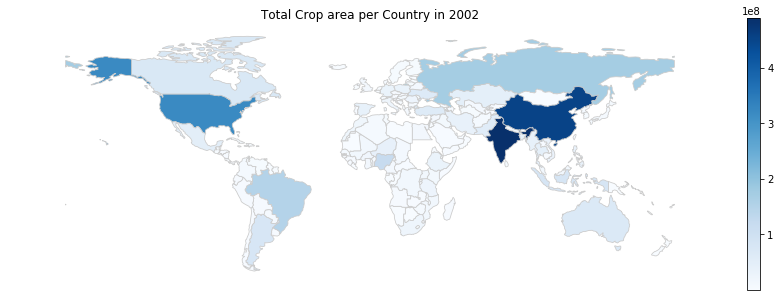

In [622]:
fig, ax = plt.subplots(figsize=(15,5))
merged.plot(column='area_total', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend = True)
ax.axis('off')
ax.set_title('Total Crop area per Country in 2002')
# this is not really representative of anything...

Text(0.5, 1.0, 'Total Crop Yield per Country in 2002')

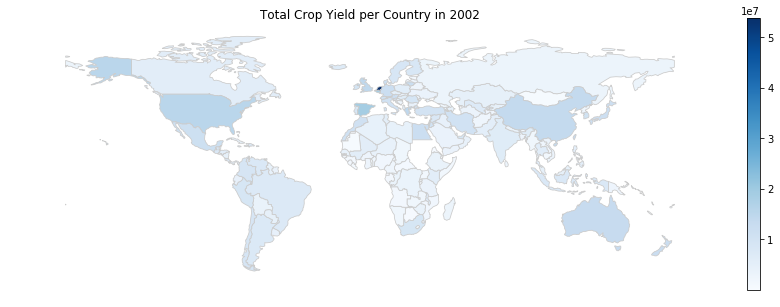

In [623]:
fig, ax = plt.subplots(figsize=(15,5))
merged.plot(column='yield_total', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend = True)
ax.axis('off')
ax.set_title('Total Crop Yield per Country in 2002')
# this is not really representative of anything...

Text(0.5, 1.0, 'Total Crop Production per Country in 2002')

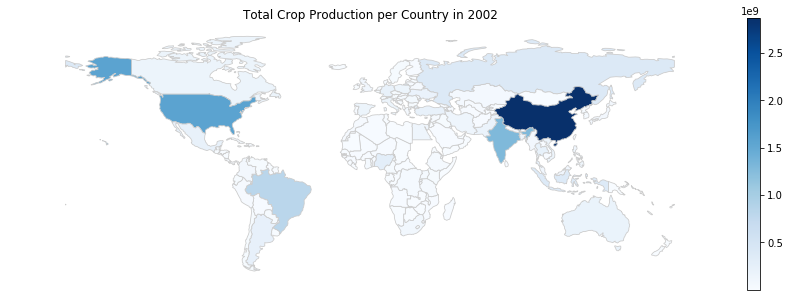

In [624]:
crops_tot = crops_area.merge(crops_yield, how = 'right').merge(crops_prod, how = 'right')
crops_tot = crops_tot[crops_tot.year == 2002]
merged = world_map.merge(crops_tot, on = 'iso_a3')

fig, ax = plt.subplots(figsize=(15,5))
merged.plot(column='prod_total', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend = True)
ax.axis('off')
ax.set_title('Total Crop Production per Country in 2002')
# this is not really representative of anything...

# LIVESTOCK PRIMARY

In [718]:
meat = livestock_primary[(livestock_primary.year == 2002)&(livestock_primary.item.str.contains('Meat')) & (livestock_primary.element == 'Production')]
meat.value[meat.unit == '1000 Head'] = meat.value.apply(lambda x: x * 1000)
meat = meat.groupby(['area', 'year', 'unit'])\
        .agg({'value':'sum'})\
        .reset_index()
meat_count = meat[meat.unit != 'tonnes'].drop('unit', axis = 1).rename({'value':'head_count'}, axis = 1)
meat_tonnes = meat[meat.unit == 'tonnes'].drop('unit', axis = 1).rename({'value':'tonnes'}, axis = 1)

C:\Users\theop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [719]:
non_meat = livestock_primary[~(livestock_primary.item.str.contains('Meat'))&(livestock_primary.year == 2002)]
non_meat.item.unique()
# still need to group milk together, eggs together, skins and hides and hair and wool, then honey, and the rest
# also if we are going to analyze this we can merge it with the livestock_processed df...

array(['Eggs, hen, in shell', 'Eggs, hen, in shell (number)',
       'Hides, cattle, fresh', 'Honey, natural',
       'Milk, whole fresh camel', 'Milk, whole fresh cow',
       'Milk, whole fresh goat', 'Milk, whole fresh sheep',
       'Silk-worm cocoons, reelable', 'Skins, goat, fresh',
       'Skins, sheep, fresh', 'Wool, greasy', 'Eggs Primary',
       'Milk,Total', 'Eggs, other bird, in shell',
       'Eggs, other bird, in shell (number)', 'Milk, whole fresh buffalo',
       'Skins, sheep, with wool', 'Beeswax', 'Hides, buffalo, fresh',
       'Offals, nes', 'Snails, not sea', 'Hair, horse'], dtype=object)

In [720]:
meat_tonnes = meat_tonnes.merge(regions\
               .rename({'country':'area'}, axis = 1)\
               .drop(['countrygroupcode','countrygroup', 'countrycode','m49code','iso2code'], axis =1)\
               , on = 'area')\
        .drop_duplicates()\
        .rename({'iso3code':'iso_a3'}, axis = 1)

merged = world_map.merge(meat_tonnes, on = 'iso_a3')


Text(0.5, 1.0, 'Total tonnes of livestock per Country in 2002')

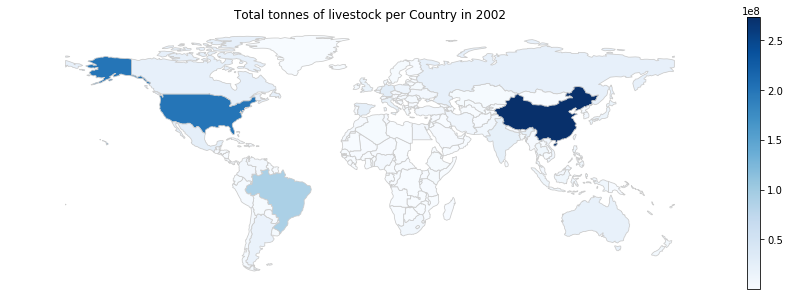

In [721]:
fig, ax = plt.subplots(figsize=(15,5))
merged.plot(column='tonnes', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend = True)
ax.axis('off')
ax.set_title('Total tonnes of livestock per Country in 2002')
# this is not really representative of anything...

# LIVESTOCK PROCESSED

In [728]:
livestock_processed.item.sort_values().unique()
# lets not worry about this for now
# should group milk together (and look at certain columns such as 'cheese all kind')

array(['Butter and Ghee', 'Butter and ghee, sheep milk',
       'Butter of goat mlk', 'Butter, buffalo milk', 'Butter, cow milk',
       'Cheese (All Kinds)', 'Cheese of goat mlk', 'Cheese, buffalo milk',
       'Cheese, sheep milk', 'Cheese, skimmed cow milk',
       'Cheese, whole cow milk', 'Cream fresh', 'Evaporat&Condensed Milk',
       'Ghee, butteroil of cow milk', 'Ghee, of buffalo milk', 'Lard',
       'Milk, dry buttermilk', 'Milk, skimmed condensed',
       'Milk, skimmed cow', 'Milk, skimmed dried',
       'Milk, skimmed evaporated', 'Milk, whole condensed',
       'Milk, whole dried', 'Milk, whole evaporated', 'Silk raw',
       'Skim Milk&Buttermilk,Dry', 'Tallow', 'Whey, condensed',
       'Whey, dry', 'Yoghurt'], dtype=object)

# LIVESTOCK

In [723]:
livestock.item.unique()
# we looked at this already

array(['Asses', 'Camels', 'Cattle', 'Chickens', 'Goats', 'Horses',
       'Mules', 'Sheep', 'Cattle and Buffaloes', 'Poultry Birds',
       'Sheep and Goats', 'Beehives', 'Buffaloes', 'Ducks',
       'Geese and guinea fowls', 'Pigs', 'Turkeys', 'Rabbits and hares',
       'Camelids, other', 'Rodents, other', 'Animals live nes',
       'Pigeons, other birds'], dtype=object)

# INDICES

In [724]:
indices.head()

areacode         area  itemcode         item  elementcode  \
0         2  Afghanistan       767  Cotton lint          432   
1         2  Afghanistan       767  Cotton lint          432   
2         2  Afghanistan       767  Cotton lint          432   
3         2  Afghanistan       767  Cotton lint          432   
4         2  Afghanistan       767  Cotton lint          432   

                                           element  yearcode  year    unit  \
0  Gross Production Index Number (2004-2006 = 100)      1961  1961  Int. $   
1  Gross Production Index Number (2004-2006 = 100)      1962  1962  Int. $   
2  Gross Production Index Number (2004-2006 = 100)      1963  1963  Int. $   
3  Gross Production Index Number (2004-2006 = 100)      1964  1964  Int. $   
4  Gross Production Index Number (2004-2006 = 100)      1965  1965  Int. $   

    value flag  
0  166.18   Fc  
1  254.15   Fc  
2  358.75   Fc  
3  254.15   Fc  
4  244.38   Fc

In [730]:
indices.item.sort_values().unique()
# PIN = production index number

array(['Agriculture (PIN)', 'Cereals,Total', 'Cotton lint', 'Cottonseed',
       'Crops (PIN)', 'Food (PIN)', 'Livestock (PIN)',
       'Meat indigenous, total', 'Milk,Total', 'Non Food (PIN)',
       'Oil, palm', 'Oilcrops, Oil Equivalent', 'Palm kernels',
       'Roots and Tubers,Total', 'Sugar, raw',
       'Vegetables and Fruit Primary'], dtype=object)

In [766]:
cont_pin = indices[(indices.item.str.contains('PIN')) & (indices.area.isin(continents_list))]\
    .drop(['areacode', 'itemcode','yearcode', 'elementcode', 'flag', 'unit'], axis = 1)\
    .groupby(['area', 'year', 'item']).agg({'value':'sum'}).reset_index().rename({'value':'USD'}, axis = 1)

In [768]:
cont_pin.area.unique()

array(['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'], dtype=object)

In [791]:
africa = cont_pin[cont_pin.area == 'Africa']
america = cont_pin[cont_pin.area == 'Americas']
asia = cont_pin[cont_pin.area == 'Asia']
europe = cont_pin[cont_pin.area == 'Europe']
oceania = cont_pin[cont_pin.area == 'Oceania']

Text(0.5, 0, 'years')

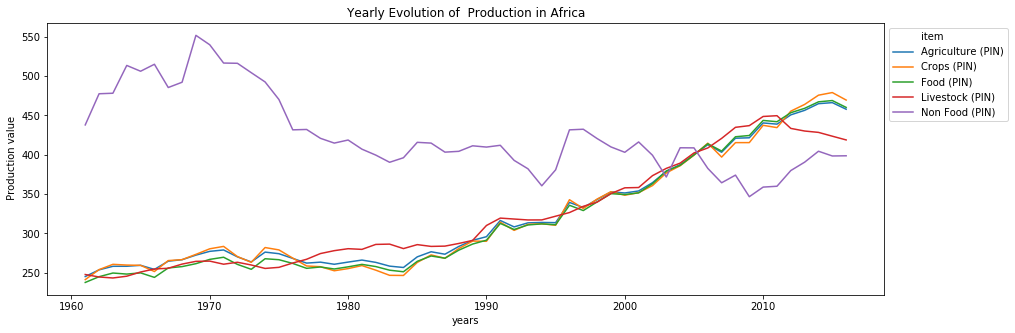

In [776]:
# should use widgets

fig, ax = plt.subplots( figsize = (15, 5))
sns.lineplot(x = 'year', y = 'USD', hue = 'item', data = africa, ax = ax)
ax.legend(bbox_to_anchor = (1, 1), loc = 'upper left', ncol = 1)
ax.set_title('Yearly Evolution of  Production in Africa')
ax.set_ylabel(" Production value")
# ax.set_yscale('log')
ax.set_xlabel('years')
# ax.set_xlim(left = 1961, right = 2014)
    
    
    

Text(0.5, 0, 'years')

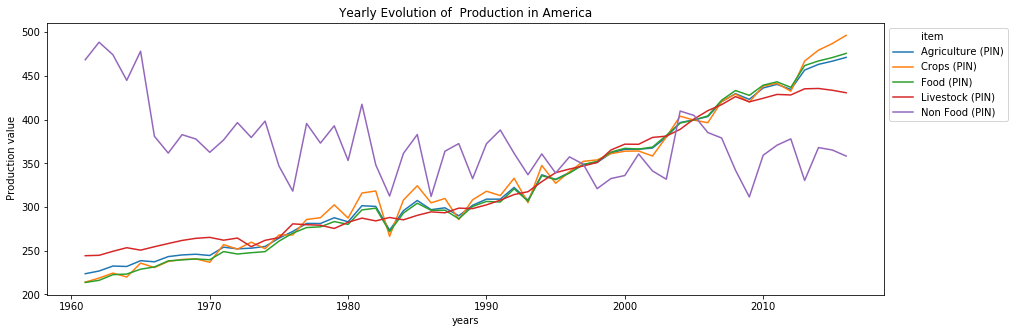

In [792]:
# should use widgets

fig, ax = plt.subplots( figsize = (15, 5))
sns.lineplot(x = 'year', y = 'USD', hue = 'item', data = america, ax = ax)
ax.legend(bbox_to_anchor = (1, 1), loc = 'upper left', ncol = 1)
ax.set_title('Yearly Evolution of  Production in America')
ax.set_ylabel(" Production value")
# ax.set_yscale('log')
ax.set_xlabel('years')
# ax.set_xlim(left = 1961, right = 2014)

Text(0.5, 0, 'years')

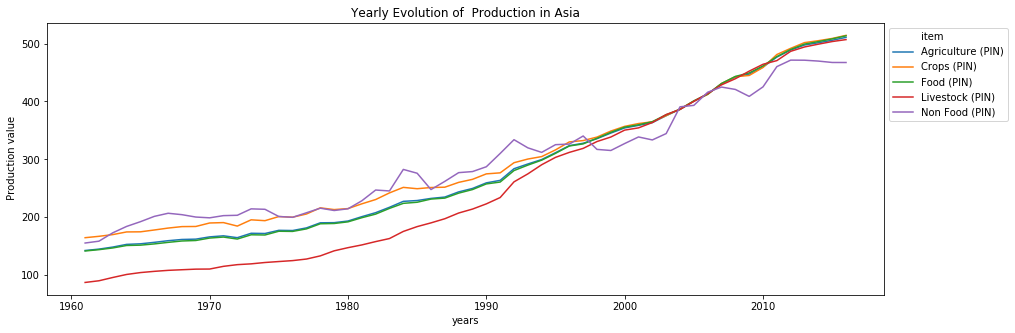

In [778]:
# should use widgets

fig, ax = plt.subplots( figsize = (15, 5))
sns.lineplot(x = 'year', y = 'USD', hue = 'item', data = asia, ax = ax)
ax.legend(bbox_to_anchor = (1, 1), loc = 'upper left', ncol = 1)
ax.set_title('Yearly Evolution of  Production in Asia')
ax.set_ylabel(" Production value")
# ax.set_yscale('log')
ax.set_xlabel('years')
# ax.set_xlim(left = 1961, right = 2014)
    
    
    

Text(0.5, 0, 'years')

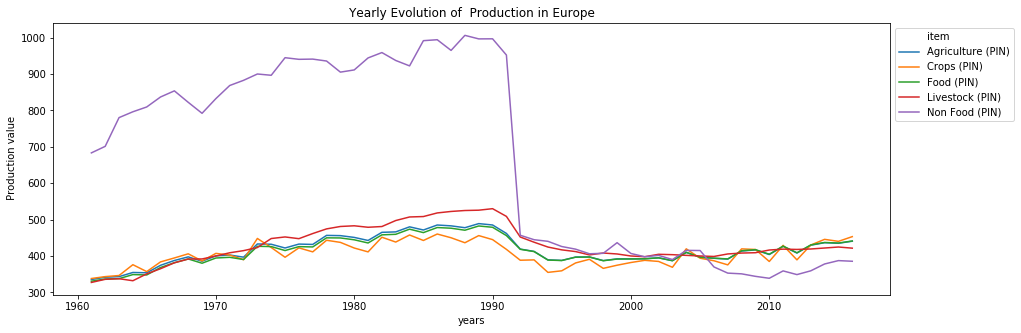

In [779]:
# should use widgets

fig, ax = plt.subplots( figsize = (15, 5))
sns.lineplot(x = 'year', y = 'USD', hue = 'item', data = europe, ax = ax)
ax.legend(bbox_to_anchor = (1, 1), loc = 'upper left', ncol = 1)
ax.set_title('Yearly Evolution of  Production in Europe')
ax.set_ylabel(" Production value")
# ax.set_yscale('log')
ax.set_xlabel('years')
# ax.set_xlim(left = 1961, right = 2014)
    
    
    

In [790]:
# 1991.... something with USSR probably.... but wtf lol. So is Russia part of Asia?
regions[(regions.country == 'Russian Federation')|(regions.country == 'USSR')]

countrygroupcode                   countrygroup  countrycode  \
182               5848              Annex I countries          185   
198               5848              Annex I countries          228   
375               5401                 Eastern Europe          185   
378               5401                 Eastern Europe          228   
425               5400                         Europe          185   
439               5400                         Europe          228   
1103              5208    Northern America and Europe          185   
1492              9011  Upper-middle-income economies          185   
1776              5000                          World          185   
1837              5000                          World          228   

                 country  m49code iso2code iso3code  
182   Russian Federation    643.0       RU      RUS  
198                 USSR    810.0      NaN      NaN  
375   Russian Federation    643.0       RU      RUS  
378                 USSR    810.0      NaN      NaN  
425   Russian Federation    643.0       RU      RUS  
439                 USSR    810.0      NaN      NaN  
1103  Russian Federation    643.0       RU      RUS  
1492  Russian Federation    643.0       RU      RUS  
1776  Russian Federation    643.0       RU      RUS  
1837                USSR    810.0      NaN      NaN

In [802]:
kgb = indices[(indices.item == 'Non Food (PIN)')&((indices.area == 'Russian Federation')|(indices.area == 'USSR'))]\
    .drop(['areacode', 'itemcode', 'item', 'elementcode', 'element', 'yearcode', 'unit','flag'], axis = 1)\
    .rename({'value':'USD'}, axis = 1)


In [807]:
indices.area.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Chile', 'China', 'China, Hong Kong SAR', 'China, Macao SAR',
       'China, mainland', 'China, Taiwan Province of', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Repu

C:\Users\theop\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'years')

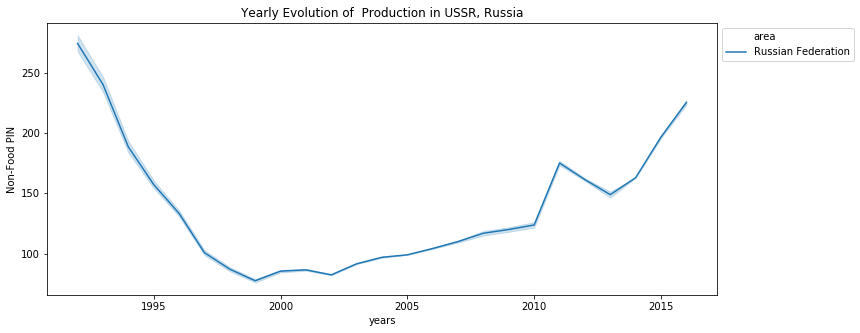

In [804]:
# should use widgets

fig, ax = plt.subplots( figsize = (12, 5))
sns.lineplot(x = 'year', y = 'USD', hue = 'area', data = kgb, ax = ax)
ax.legend(bbox_to_anchor = (1, 1), loc = 'upper left', ncol = 1)
ax.set_title('Yearly Evolution of  Production in USSR, Russia')
ax.set_ylabel("Non-Food PIN")
# ax.set_yscale('log')
ax.set_xlabel('years')
# ax.set_xlim(left = 1961, right = 2014)
    
    
    

Text(0.5, 0, 'years')

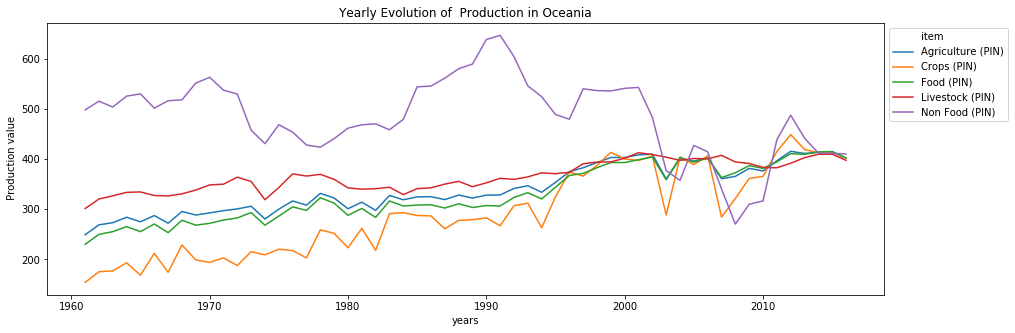

In [780]:
# should use widgets

fig, ax = plt.subplots( figsize = (15, 5))
sns.lineplot(x = 'year', y = 'USD', hue = 'item', data = oceania, ax = ax)
ax.legend(bbox_to_anchor = (1, 1), loc = 'upper left', ncol = 1)
ax.set_title('Yearly Evolution of  Production in Oceania')
ax.set_ylabel(" Production value")
# ax.set_yscale('log')
ax.set_xlabel('years')
# ax.set_xlim(left = 1961, right = 2014)
    
    
    

# TO DO

create function : to normalize by pop (add column to df by merge)

create function : to enable geoplot with any df (merge df with gpd df)

use bokeh to have different stuff on 1 plot (yield area and production for CROPS df e.g.)

use widgets to have year by year evolution of stuff on plots (use different notebook, should probably pickle)

investigate on how data within production can be used to quantify env impact etc.

create function: convert 1000head to head

create function to merge with flag complete name (merge with flags)

create function to compute percentage of flags vs nan

create function to merge area with corresponding continent, income type, etc...
!!!!!! CHECK that income type is stil relevant nowadays !!!!!!